# Find Groups

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

def log_format(x, pos):
    return r"$\mathbf{10^{%.1f}}$" % x  # Forces bold in LaTeX mathtext

# Load the data
df = pd.read_csv('/home/wschertzer3/aem_aging/fixed_time.csv')

# Filter the dataset for OHCond(mS/cm)
ohcond_data = df[df["prop"] == "OHCond(mS/cm)"]

# Group by unique identifiers, including the additional filtering columns
group_columns = [
    "smiles1", "smiles2", "smiles3", "c1", "c2", "c3",
    "Temp(C)", "RH(%)", "solvent", "solvent_conc(M)", 
    'additive_smiles1', 'additive_smiles2', 
    'additive_smiles3', 'additivec1', 'additivec2', 'additivec3', 'stab_temp',
]

# Filter groups where time varies
time_varying_groups = ohcond_data.groupby(group_columns).filter(lambda g: g["time(h)"].nunique() > 1)

# Count the number of unique groups where time varies
num_time_varying_groups = (
    ohcond_data.groupby(group_columns)
    .filter(lambda g: g["time(h)"].nunique() > 1)
    .groupby(group_columns)
    .ngroups  # Count the number of unique groups
)

print(num_time_varying_groups)

# Iterate through each group to create scatterplots
max_plots = 100000
i = 0

import matplotlib as mpl
from matplotlib.font_manager import FontProperties

# Set global properties
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24
mpl.rcParams['text.usetex'] = False  # Disable LaTeX override

# Define bold font property
bold_font = FontProperties(weight='bold', size=24)

for name, group in time_varying_groups.groupby(group_columns, group_keys=False):
    if i == 85:
        # print(group)
        print(group.smiles1.iloc[0],group.c1.iloc[0] )
        print(group.smiles2.iloc[0], group.c2.iloc[0])
        print(group.smiles3.iloc[0])
       
    i += 1


101
[*]Oc1ccc(S(=O)(c2ccc(Oc3cc(OCCC[N+](C)(C)C)c([*])cc3)cc2)=O)cc1.[OH-] 50.0
O=S(c1ccc(O[*])cc1)(c2ccc(Oc3ccc(C(C(F)(F)F)(C(F)(F)F)c4ccc([*])cc4)cc3)cc2)=O 50.0
*CC*


# Plot Groups

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

def log_format(x, pos):
    return r"$\mathbf{10^{%.1f}}$" % x  # Forces bold in LaTeX mathtext

# Load the data
df = pd.read_csv('/home/wschertzer3/aem_aging/fixed_time.csv')

# Filter the dataset for OHCond(mS/cm)
ohcond_data = df[df["prop"] == "OHCond(mS/cm)"]

# Group by unique identifiers, including the additional filtering columns
group_columns = [
    "smiles1", "smiles2", "smiles3", "c1", "c2", "c3",
    "Temp(C)", "RH(%)", "solvent", "solvent_conc(M)", 
    'additive_smiles1', 'additive_smiles2', 
    'additive_smiles3', 'additivec1', 'additivec2', 'additivec3', 'stab_temp'
]

# Filter groups where time varies
time_varying_groups = ohcond_data.groupby(group_columns).filter(lambda g: g["time(h)"].nunique() > 1)

# Iterate through each group to create scatterplots
max_plots = 100000
i = 0

import matplotlib as mpl
from matplotlib.font_manager import FontProperties

# Set global properties
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24
mpl.rcParams['text.usetex'] = False  # Disable LaTeX override

# Define bold font property
bold_font = FontProperties(weight='bold', size=24)

for name, group in time_varying_groups.groupby(group_columns, group_keys=False):
    if i < max_plots:
        fig, ax1 = plt.subplots(figsize=(8, 6))
        
        # Primary axis: OHCond(mS/cm) vs time
        ax1.scatter(
            group["time(h)"].astype(float), 
            group["value"].astype(float), 
            label="OHCond(mS/cm)", 
            alpha=0.7, 
            edgecolors='black',
            s=200  # Increased scatter point size
        )

        # Set ticks explicitly
        ax1.set_xticks([0, 1, 2, 3])
        ax1.set_yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5])



        # Set y-ticks at multiples of 0.5
        ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

        # Format x and y tick labels as 10^x
        ax1.xaxis.set_major_formatter(ticker.FuncFormatter(log_format))
        ax1.yaxis.set_major_formatter(ticker.FuncFormatter(log_format))

        # Format tick labels
        ax1.tick_params(axis='both', labelsize=24)
        plt.setp(ax1.get_xticklabels(), fontweight="bold")
        plt.setp(ax1.get_yticklabels(), fontweight="bold")

        # ax1.set_xlabel("Time (h)", fontweight="bold", fontsize=24)
        # ax1.set_ylabel(r"OH$^{-}$ Conductivity (mS/cm)", fontweight="bold", fontsize=24)

        # Adjust layout for better readability
        plt.tight_layout()

        # Save the plot with high resolution
        filename = f"plots/cond/scatter_ohcond_exp_iec_vs_time_{i}.png"
        plt.savefig(filename, bbox_inches='tight', dpi=300)
        plt.close(fig)
        
        i += 1



# WU

      Unnamed: 0 Backbone Cation Sample  \
2098        2410       PE    TMA      7   
2099        2411       PE    TMA      7   

                                              smiles1 smiles2 smiles3     c1  \
2098  *CC(C)(C[N+](C)(CCCCCCCC[N+](C)(CC(C)(C)C)C)C)*    *CC*    *CC*  100.0   
2099  *CC(C)(C[N+](C)(CCCCCCCC[N+](C)(CC(C)(C)C)C)C)*    *CC*    *CC*  100.0   

       c2   c3  ... stab_temp  RH(%)   lw Temp(C) EXP_IEC     prop  time (h)  \
2098  0.0  0.0  ...      80.0  100.0  1.0    80.0     NaN  WU(wt%)      30.0   
2099  0.0  0.0  ...      80.0  100.0  1.0    80.0     NaN  WU(wt%)     720.0   

         value                                            DOI  theor_IEC  
2098  1.863323  https://doi.org/10.1021/acsenergylett.3c00319       6.13  
2099  1.934498  https://doi.org/10.1021/acsenergylett.3c00319       6.13  

[2 rows x 30 columns]


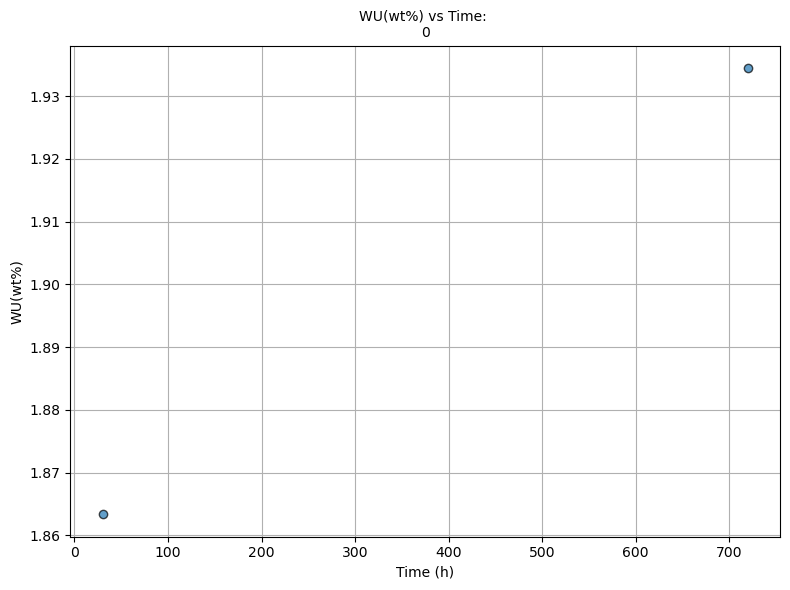

      Unnamed: 0 Backbone Cation Sample                   smiles1 smiles2  \
2193        2505       PE    TMA     17  *CC(C)(C[N+]1(C)CCOCC1)*    *CC*   
2194        2506       PE    TMA     17  *CC(C)(C[N+]1(C)CCOCC1)*    *CC*   

     smiles3     c1   c2   c3  ... stab_temp  RH(%)   lw Temp(C) EXP_IEC  \
2193    *CC*  100.0  0.0  0.0  ...      80.0  100.0  1.0    80.0     NaN   
2194    *CC*  100.0  0.0  0.0  ...      80.0  100.0  1.0    80.0     NaN   

         prop  time (h)     value  \
2193  WU(wt%)      30.0  1.939519   
2194  WU(wt%)     720.0  1.278754   

                                                DOI  theor_IEC  
2193  https://doi.org/10.1021/acsenergylett.3c00319        6.4  
2194  https://doi.org/10.1021/acsenergylett.3c00319        6.4  

[2 rows x 30 columns]


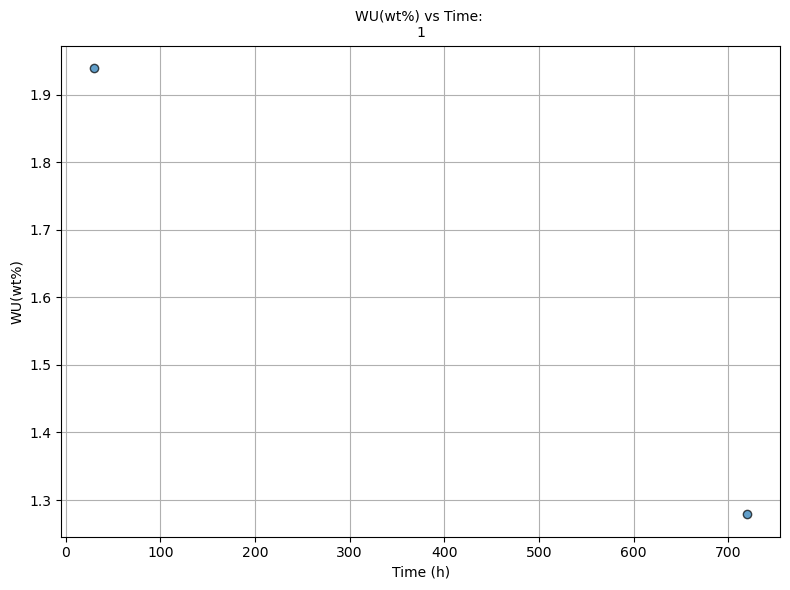

      Unnamed: 0 Backbone Cation Sample              smiles1 smiles2 smiles3  \
2208        2520       PE    TMA      1  *CC(C)(C[NH+](C)C)*    *CC*    *CC*   
2209        2521       PE    TMA      1  *CC(C)(C[NH+](C)C)*    *CC*    *CC*   

         c1   c2   c3  ... stab_temp  RH(%)   lw Temp(C) EXP_IEC     prop  \
2208  100.0  0.0  0.0  ...      80.0  100.0  1.0    80.0     NaN  WU(wt%)   
2209  100.0  0.0  0.0  ...      80.0  100.0  1.0    80.0     NaN  WU(wt%)   

      time (h)     value                                            DOI  \
2208      30.0  1.897627  https://doi.org/10.1021/acsenergylett.3c00319   
2209     720.0  1.973128  https://doi.org/10.1021/acsenergylett.3c00319   

      theor_IEC  
2208       9.99  
2209       9.99  

[2 rows x 30 columns]


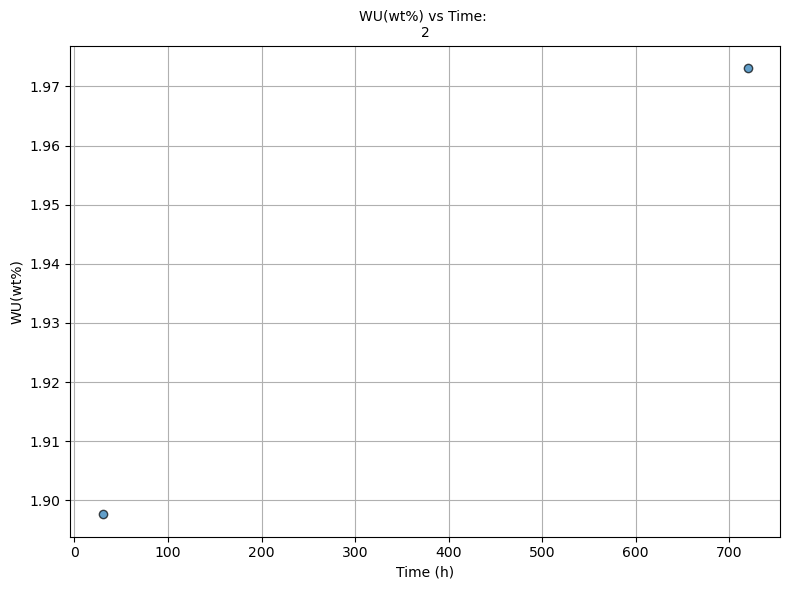

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/wschertzer3/aem_aging/create_datasets/shared_datasets/dataset_2_7_25.csv')

# Filter the dataset for OHCond(mS/cm)
ohcond_data = df[df["prop"] == "WU(wt%)"]

# Group by unique identifiers, including the additional filtering columns
# group_columns = [
#     "smiles1", "smiles2", "smiles3", "c1", "c2", "c3",
#     "Temp(C)", "RH(%)", "solvent", "solvent_conc(M)", 
#     'additive_smiles_1', 'additive_smiles_2', 
#     'additive_smiles_3', 'additive1_c', 'additive1_c', 'additive3_c',
# ]

# Filter groups where time varies
time_varying_groups = ohcond_data.groupby(group_columns).filter(lambda g: g["time (h)"].nunique() > 1)

# Iterate through each group to create scatterplots
i = 0
for name, group in time_varying_groups.groupby(group_columns):
    print(group)
    plt.figure(figsize=(8, 6))
    
    # Scatter plot WU vs time
    plt.scatter(group["time (h)"].astype(float), group["value"].astype(float), label="WU(wt%)", alpha=0.7, edgecolors='k')
    
    # Customize the plot
    title = f"WU(wt%) vs Time: \n{i}"
    plt.title(title, fontsize=10)
    plt.xlabel("Time (h)")
    plt.ylabel("WU(wt%)")
    plt.grid(True)
    # plt.gca().invert_yaxis()  # Invert the y-axis to make larger values go upward
    plt.tight_layout()
    
    # Save or display the plot
    filename = f"plots/WU/scatter_wu_vs_time_{i}.png"
    plt.savefig(filename)
    plt.show()
    i+=1



# Swelling

      Unnamed: 0 Backbone Cation Sample  \
2096        2408       PE    TMA      7   
2097        2409       PE    TMA      7   

                                              smiles1 smiles2 smiles3     c1  \
2096  *CC(C)(C[N+](C)(CCCCCCCC[N+](C)(CC(C)(C)C)C)C)*    *CC*    *CC*  100.0   
2097  *CC(C)(C[N+](C)(CCCCCCCC[N+](C)(CC(C)(C)C)C)C)*    *CC*    *CC*  100.0   

       c2   c3  ... stab_temp  RH(%)   lw Temp(C) EXP_IEC         prop  \
2096  0.0  0.0  ...      80.0  100.0  1.0    80.0     NaN  Swelling(%)   
2097  0.0  0.0  ...      80.0  100.0  1.0    80.0     NaN  Swelling(%)   

      time (h)     value                                            DOI  \
2096      30.0  1.113943  https://doi.org/10.1021/acsenergylett.3c00319   
2097     720.0  1.041393  https://doi.org/10.1021/acsenergylett.3c00319   

      theor_IEC  
2096       6.13  
2097       6.13  

[2 rows x 30 columns]


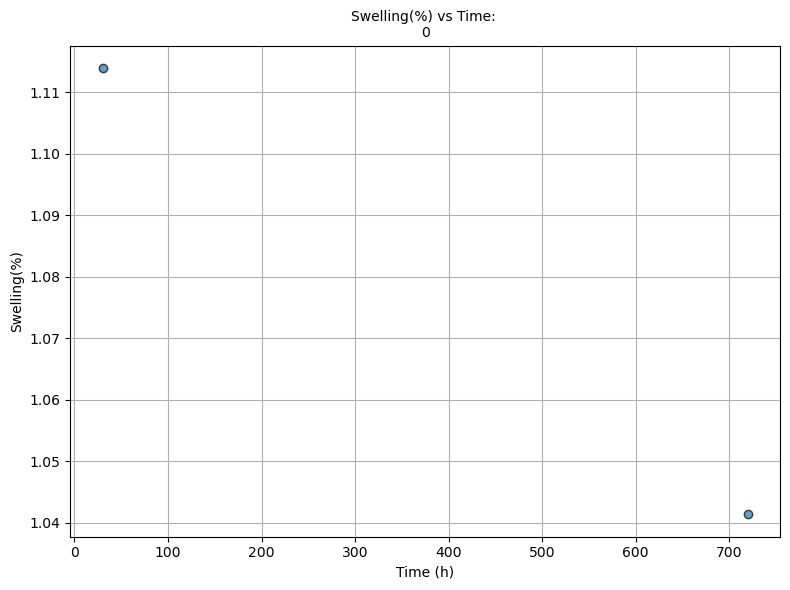

      Unnamed: 0 Backbone Cation Sample                   smiles1 smiles2  \
2191        2503       PE    TMA     17  *CC(C)(C[N+]1(C)CCOCC1)*    *CC*   
2192        2504       PE    TMA     17  *CC(C)(C[N+]1(C)CCOCC1)*    *CC*   

     smiles3     c1   c2   c3  ... stab_temp  RH(%)   lw Temp(C) EXP_IEC  \
2191    *CC*  100.0  0.0  0.0  ...      80.0  100.0  1.0    80.0     NaN   
2192    *CC*  100.0  0.0  0.0  ...      80.0  100.0  1.0    80.0     NaN   

             prop  time (h)     value  \
2191  Swelling(%)      30.0  1.041393   
2192  Swelling(%)       0.0  0.602060   

                                                DOI  theor_IEC  
2191  https://doi.org/10.1021/acsenergylett.3c00319        6.4  
2192  https://doi.org/10.1021/acsenergylett.3c00319        6.4  

[2 rows x 30 columns]


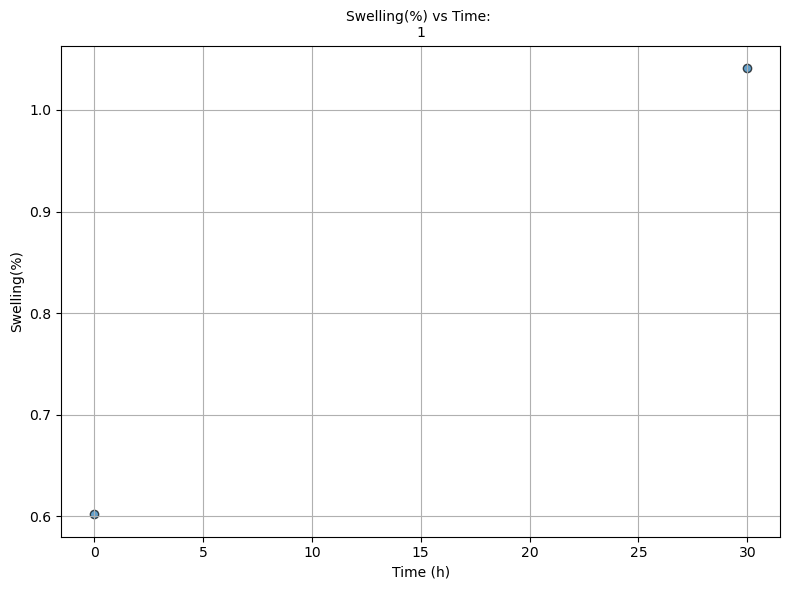

      Unnamed: 0 Backbone Cation Sample              smiles1 smiles2 smiles3  \
2206        2518       PE    TMA      1  *CC(C)(C[NH+](C)C)*    *CC*    *CC*   
2207        2519       PE    TMA      1  *CC(C)(C[NH+](C)C)*    *CC*    *CC*   

         c1   c2   c3  ... stab_temp  RH(%)   lw Temp(C) EXP_IEC         prop  \
2206  100.0  0.0  0.0  ...      80.0  100.0  1.0    80.0     NaN  Swelling(%)   
2207  100.0  0.0  0.0  ...      80.0  100.0  1.0    80.0     NaN  Swelling(%)   

      time (h)     value                                            DOI  \
2206      30.0  0.954243  https://doi.org/10.1021/acsenergylett.3c00319   
2207     720.0  1.000000  https://doi.org/10.1021/acsenergylett.3c00319   

      theor_IEC  
2206       9.99  
2207       9.99  

[2 rows x 30 columns]


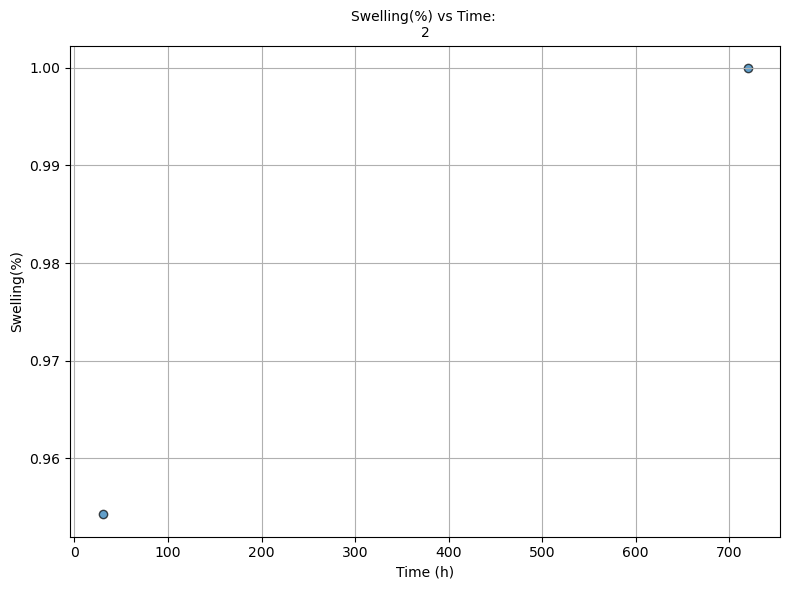

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/home/wschertzer3/aem_aging/create_datasets/shared_datasets/dataset_2_7_25.csv')

# Filter the dataset for Swelling(%)
swelling_data = df[df["prop"] == "Swelling(%)"]

# Group by unique identifiers, including the additional filtering columns
# group_columns = [
#     "smiles1", "smiles2", "smiles3", "c1", "c2", "c3",
#     "Temp(C)", "RH(%)", "solvent", "solvent_conc(M)", 
#     'additive_smiles_1', 'additive_smiles_2', 
#     'additive_smiles_3', 'additive1_c', 'additive2_c', 'additive3_c',
# ]

# Filter groups where time varies
time_varying_groups = swelling_data.groupby(group_columns).filter(lambda g: g["time (h)"].nunique() > 1)

# Iterate through each group to create scatterplots
i = 0
for name, group in time_varying_groups.groupby(group_columns):
    print(group)
    plt.figure(figsize=(8, 6))
    
    # Scatter plot Swelling(%) vs time
    plt.scatter(group["time (h)"].astype(float), group["value"].astype(float), label="Swelling(%)", alpha=0.7, edgecolors='k')
    
    # Customize the plot
    title = f"Swelling(%) vs Time: \n{i}"
    plt.title(title, fontsize=10)
    plt.xlabel("Time (h)")
    plt.ylabel("Swelling(%)")
    plt.grid(True)
    plt.tight_layout()
    
    # Save or display the plot
    filename = f"plots/Swelling/scatter_swelling_vs_time_{i}.png"
    plt.savefig(filename)
    plt.show()
    i += 1




# YM

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/data/wschertzer/aem_aging/data/updated_df_aging.csv')

# Filter the dataset for YM (MPa)
ym_data = df[df["prop"] == "YM(MPa)"]

# Group by unique identifiers, including the additional filtering columns
group_columns = [
    "smiles1", "smiles2", "smiles3", "c1", "c2", "c3",
    "Temp(C)", "RH(%)", "solvent", "solvent_conc(M)", 
    'additive_smiles_1', 'additive_smiles_2', 
    'additive_smiles_3', 'additive1_c', 'additive2_c', 'additive3_c',
]

# Filter groups where time varies
time_varying_groups = ym_data.groupby(group_columns).filter(lambda g: g["time (h)"].nunique() > 1)

# Iterate through each group to create scatterplots
i = 0
for name, group in time_varying_groups.groupby(group_columns):
    print(group)
    plt.figure(figsize=(8, 6))
    
    # Scatter plot YM (MPa) vs time
    plt.scatter(group["time (h)"].astype(float), group["value"].astype(float), label="YM(MPa)", alpha=0.7, edgecolors='k')
    
    # Customize the plot
    title = f"YM (MPa) vs Time: \n{i}"
    plt.title(title, fontsize=10)
    plt.xlabel("Time (h)")
    plt.ylabel("YM (MPa)")
    plt.grid(True)
    plt.tight_layout()
    
    # Save or display the plot
    filename = f"plots/scatter_ym_vs_time_{i}.png"
    plt.savefig(filename)
    plt.show()
    i += 1


# TS

     Backbone Cation Sample  \
3661     PAES    TMA  QPAES   
3662     PAES    TMA  QPAES   

                                                smiles1 smiles2 smiles3  \
3661  O=S(c1ccc(O[*])cc1)(c2ccc(Oc3ccc(C(C4=CC=CC=C4...    *CC*    *CC*   
3662  O=S(c1ccc(O[*])cc1)(c2ccc(Oc3ccc(C(C4=CC=CC=C4...    *CC*    *CC*   

         c1   c2 c3 additive_name_1  ... stab_temp  RH(%)   lw Temp(C)  \
3661  100.0  0.0  0             NaN  ...      60.0  100.0  1.0      60   
3662  100.0  0.0  0             NaN  ...      60.0  100.0  1.0      60   

      Theor_IEC EXP_IEC     prop time (h)  value  DOI  
3661        NaN     NaN  TS(MPa)       24  25.29  NaN  
3662        NaN     NaN  TS(MPa)      170  23.39  NaN  

[2 rows x 29 columns]


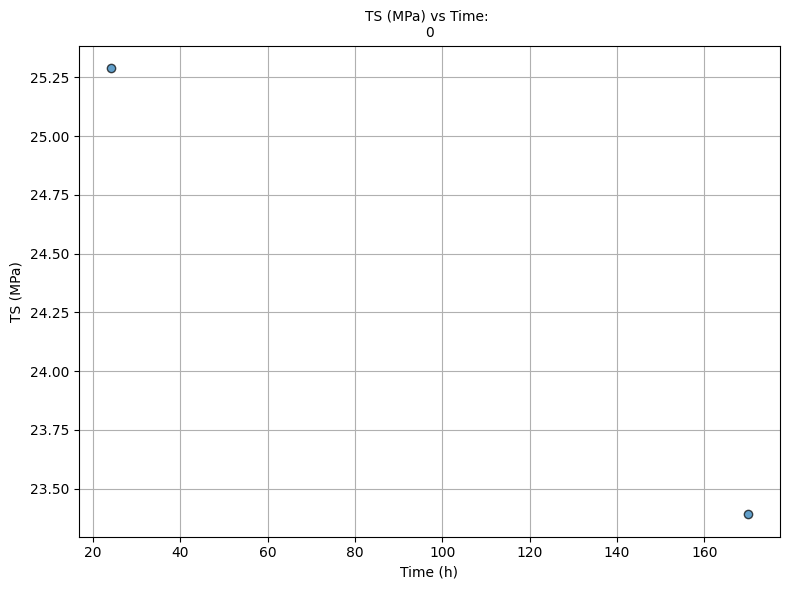

     Backbone Cation         Sample  \
3684     PAES    TMA  QPAES/2.5ZrO2   
3685     PAES    TMA  QPAES/2.5ZrO2   

                                                smiles1 smiles2 smiles3  \
3684  O=S(c1ccc(O[*])cc1)(c2ccc(Oc3ccc(C(C4=CC=CC=C4...    *CC*    *CC*   
3685  O=S(c1ccc(O[*])cc1)(c2ccc(Oc3ccc(C(C4=CC=CC=C4...    *CC*    *CC*   

         c1   c2 c3 additive_name_1  ... stab_temp  RH(%)   lw Temp(C)  \
3684  100.0  0.0  0            ZrO2  ...      60.0  100.0  1.0      60   
3685  100.0  0.0  0            ZrO2  ...      60.0  100.0  1.0      60   

      Theor_IEC EXP_IEC     prop time (h)  value  DOI  
3684        NaN     NaN  TS(MPa)       24  29.78  NaN  
3685        NaN     NaN  TS(MPa)      170  27.37  NaN  

[2 rows x 29 columns]


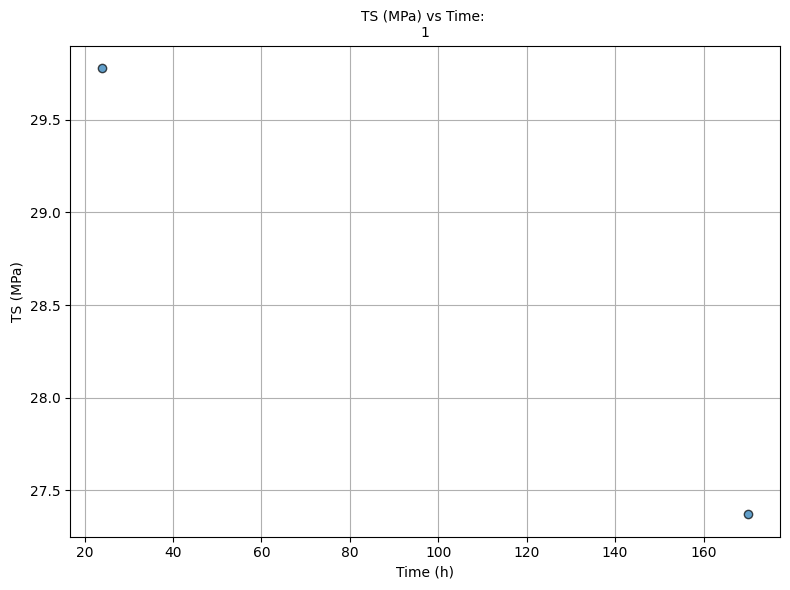

     Backbone Cation       Sample  \
3704     PAES    TMA  QPAES/5ZrO2   
3705     PAES    TMA  QPAES/5ZrO2   

                                                smiles1 smiles2 smiles3  \
3704  O=S(c1ccc(O[*])cc1)(c2ccc(Oc3ccc(C(C4=CC=CC=C4...    *CC*    *CC*   
3705  O=S(c1ccc(O[*])cc1)(c2ccc(Oc3ccc(C(C4=CC=CC=C4...    *CC*    *CC*   

         c1   c2 c3 additive_name_1  ... stab_temp  RH(%)   lw Temp(C)  \
3704  100.0  0.0  0            ZrO2  ...      60.0  100.0  1.0      60   
3705  100.0  0.0  0            ZrO2  ...      60.0  100.0  1.0      60   

      Theor_IEC EXP_IEC     prop time (h)  value  DOI  
3704        NaN     NaN  TS(MPa)       24   37.4  NaN  
3705        NaN     NaN  TS(MPa)      170  34.07  NaN  

[2 rows x 29 columns]


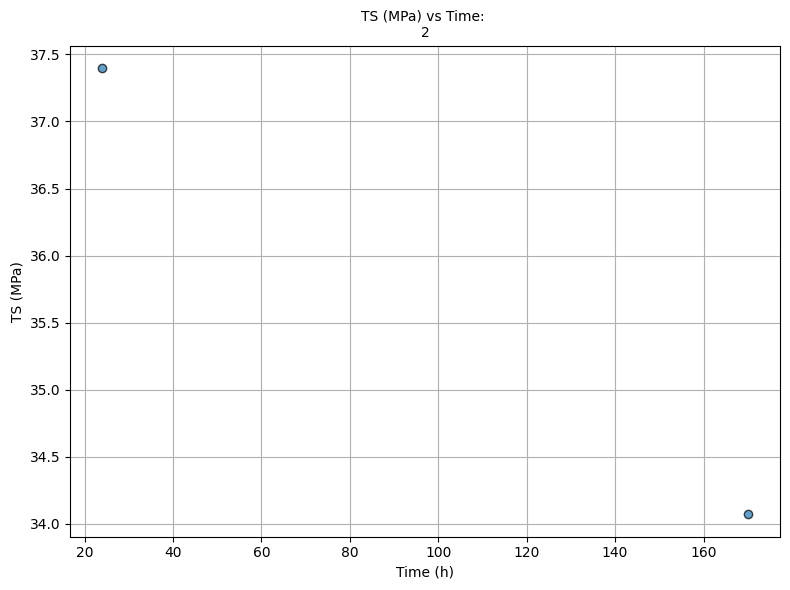

     Backbone Cation         Sample  \
3724     PAES    TMA  QPAES/7.5ZrO2   
3725     PAES    TMA  QPAES/7.5ZrO2   

                                                smiles1 smiles2 smiles3  \
3724  O=S(c1ccc(O[*])cc1)(c2ccc(Oc3ccc(C(C4=CC=CC=C4...    *CC*    *CC*   
3725  O=S(c1ccc(O[*])cc1)(c2ccc(Oc3ccc(C(C4=CC=CC=C4...    *CC*    *CC*   

         c1   c2 c3 additive_name_1  ... stab_temp  RH(%)   lw Temp(C)  \
3724  100.0  0.0  0            ZrO2  ...      60.0  100.0  1.0      60   
3725  100.0  0.0  0            ZrO2  ...      60.0  100.0  1.0      60   

      Theor_IEC EXP_IEC     prop time (h)  value  DOI  
3724        NaN     NaN  TS(MPa)       24   35.1  NaN  
3725        NaN     NaN  TS(MPa)      170  31.87  NaN  

[2 rows x 29 columns]


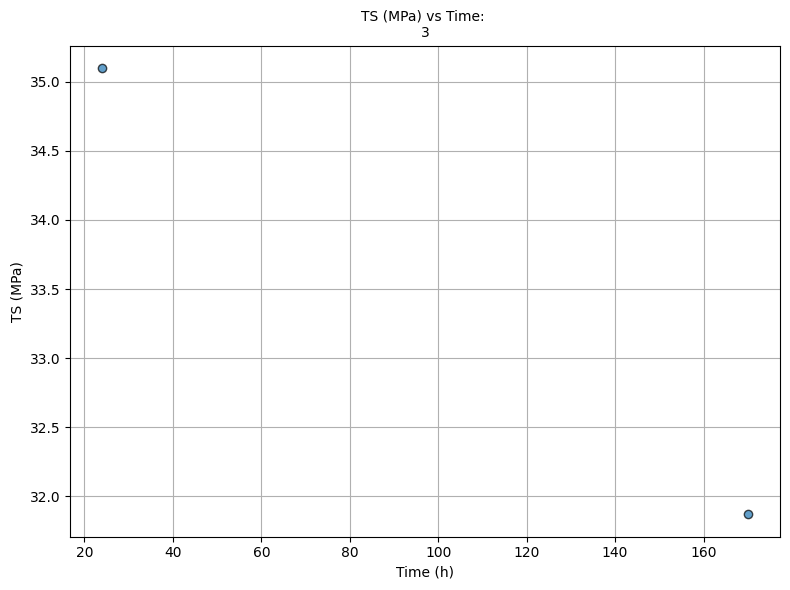

     Backbone Cation        Sample  \
3744     PAES    TMA  QPAES/10ZrO2   
3745     PAES    TMA  QPAES/10ZrO2   

                                                smiles1 smiles2 smiles3  \
3744  O=S(c1ccc(O[*])cc1)(c2ccc(Oc3ccc(C(C4=CC=CC=C4...    *CC*    *CC*   
3745  O=S(c1ccc(O[*])cc1)(c2ccc(Oc3ccc(C(C4=CC=CC=C4...    *CC*    *CC*   

         c1   c2 c3 additive_name_1  ... stab_temp  RH(%)   lw Temp(C)  \
3744  100.0  0.0  0            ZrO2  ...      60.0  100.0  1.0      60   
3745  100.0  0.0  0            ZrO2  ...      60.0  100.0  1.0      60   

      Theor_IEC EXP_IEC     prop time (h)  value  DOI  
3744        NaN     NaN  TS(MPa)       24  30.41  NaN  
3745        NaN     NaN  TS(MPa)      170  28.15  NaN  

[2 rows x 29 columns]


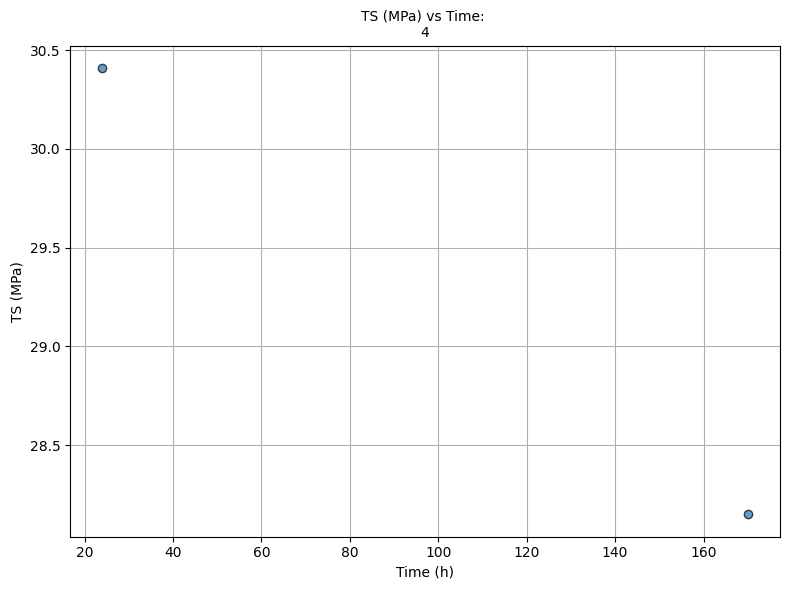

     Backbone Cation        Sample  \
3764     PAES    TMA  QPAES/20ZrO2   
3765     PAES    TMA  QPAES/20ZrO2   

                                                smiles1 smiles2 smiles3  \
3764  O=S(c1ccc(O[*])cc1)(c2ccc(Oc3ccc(C(C4=CC=CC=C4...    *CC*    *CC*   
3765  O=S(c1ccc(O[*])cc1)(c2ccc(Oc3ccc(C(C4=CC=CC=C4...    *CC*    *CC*   

         c1   c2 c3 additive_name_1  ... stab_temp  RH(%)   lw Temp(C)  \
3764  100.0  0.0  0            ZrO2  ...      60.0  100.0  1.0      60   
3765  100.0  0.0  0            ZrO2  ...      60.0  100.0  1.0      60   

      Theor_IEC EXP_IEC     prop time (h)  value  DOI  
3764        NaN     NaN  TS(MPa)       24   27.7  NaN  
3765        NaN     NaN  TS(MPa)      170  24.85  NaN  

[2 rows x 29 columns]


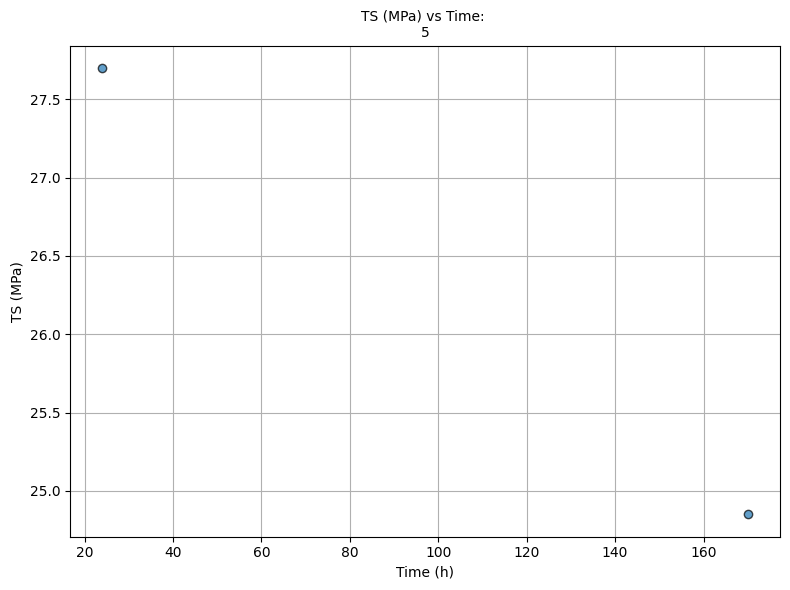

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/data/wschertzer/aem_aging/data/updated_df_aging.csv')

# Filter the dataset for TS (MPa)
ts_data = df[df["prop"] == "TS(MPa)"]

# Group by unique identifiers, including the additional filtering columns
group_columns = [
    "smiles1", "smiles2", "smiles3", "c1", "c2", "c3",
    "Temp(C)", "RH(%)", "solvent", "solvent_conc(M)", 
    'additive_smiles_1', 'additive_smiles_2', 
    'additive_smiles_3', 'additive1_c', 'additive2_c', 'additive3_c',
]

# Filter groups where time varies
time_varying_groups = ts_data.groupby(group_columns).filter(lambda g: g["time (h)"].nunique() > 1)

# Iterate through each group to create scatterplots
i = 0
for name, group in time_varying_groups.groupby(group_columns):
    print(group)
    plt.figure(figsize=(8, 6))
    
    # Scatter plot TS (MPa) vs time
    plt.scatter(group["time (h)"].astype(float), group["value"].astype(float), label="TS(MPa)", alpha=0.7, edgecolors='k')
    
    # Customize the plot
    title = f"TS (MPa) vs Time: \n{i}"
    plt.title(title, fontsize=10)
    plt.xlabel("Time (h)")
    plt.ylabel("TS (MPa)")
    plt.grid(True)
    plt.tight_layout()
    
    # Save or display the plot
    filename = f"plots/scatter_ts_vs_time_{i}.png"
    plt.savefig(filename)
    plt.show()
    i += 1


# EB

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/data/wschertzer/aem_aging/data/updated_df_aging.csv')

# Filter the dataset for EB (%)
eb_data = df[df["prop"] == "EB(%)"]

# Group by unique identifiers, including the additional filtering columns
group_columns = [
    "smiles1", "smiles2", "smiles3", "c1", "c2", "c3",
    "Temp(C)", "RH(%)", "solvent", "solvent_conc(M)", 
    'additive_smiles_1', 'additive_smiles_2', 
    'additive_smiles_3', 'additive1_c', 'additive2_c', 'additive3_c',
]

# Filter groups where time varies
time_varying_groups = eb_data.groupby(group_columns).filter(lambda g: g["time (h)"].nunique() > 1)

# Iterate through each group to create scatterplots
i = 0
for name, group in time_varying_groups.groupby(group_columns):
    print(group)
    plt.figure(figsize=(8, 6))
    
    # Scatter plot EB (%) vs time
    plt.scatter(group["time (h)"].astype(float), group["value"].astype(float), label="EB(%)", alpha=0.7, edgecolors='k')
    
    # Customize the plot
    title = f"EB (%) vs Time: \n{i}"
    plt.title(title, fontsize=10)
    plt.xlabel("Time (h)")
    plt.ylabel("EB (%)")
    plt.grid(True)
    plt.tight_layout()
    
    # Save or display the plot
    filename = f"plots/scatter_eb_vs_time_{i}.png"
    plt.savefig(filename)
    plt.show()
    i += 1
